In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/Users/tuhinalambijoy/Downloads/StudentsPerformance.csv')

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df = df.drop(['lunch','test preparation course'], axis=1)


In [7]:
df

,gender,race/ethnicity,parental level of education,math score,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,some college,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,some college,76,78,75
...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95
996,male,group C,high school,62,55,55
997,female,group C,high school,59,71,65
998,female,group D,some college,68,78,77


In [8]:
df.shape                # rows, cols
df.head()               # first few rows
df.info()               # dtypes and non-null counts
df.describe(include='all')   # stats for numeric & object
df.isna().sum().sort_values(ascending=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   math score                   1000 non-null   int64 
 4   reading score                1000 non-null   int64 
 5   writing score                1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df_raw = df.copy()


In [10]:
df.columns = (
    df.columns.str.strip()              # remove whitespace
              .str.lower()              # lowercase
              .str.replace(' ', '_')    # spaces → underscores
              .str.replace(r'[^\w_]', '', regex=True)  # remove weird chars
)


In [11]:
df.head()

,gender,raceethnicity,parental_level_of_education,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,some college,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,some college,76,78,75


In [12]:
df['math_score'] = df['math_score'].fillna(df['math_score'].median())

In [13]:
df['math_score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [14]:
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].median())

In [15]:
df['reading_score'].isnull().any()

np.False_

In [16]:
df['writing_score'].isnull().any()

np.False_

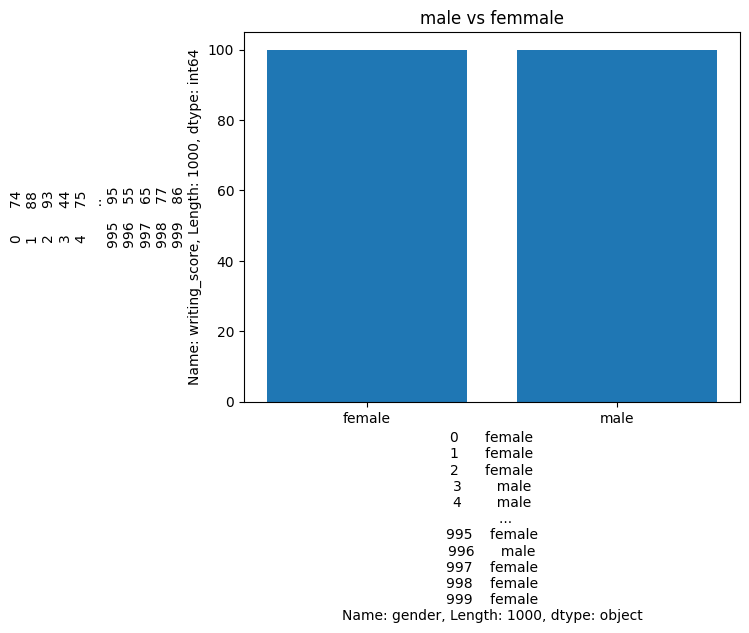

In [17]:
plt.bar(df['gender'],df['writing_score'])
plt.xlabel(df["gender"])
plt.ylabel(df['writing_score'])
plt.title('male vs femmale')
plt.show()

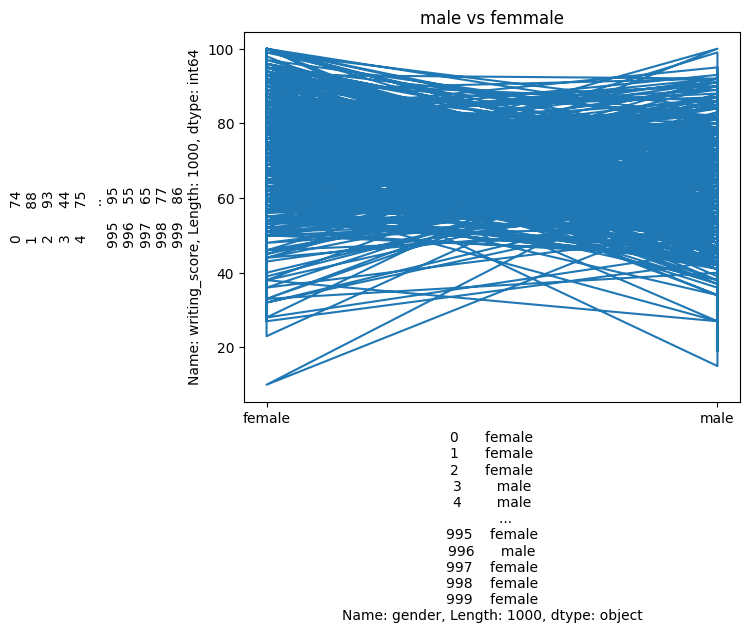

In [18]:
plt.plot(df['gender'],df['writing_score'])
plt.xlabel(df["gender"])
plt.ylabel(df['writing_score'])
plt.title('male vs femmale')
plt.show()

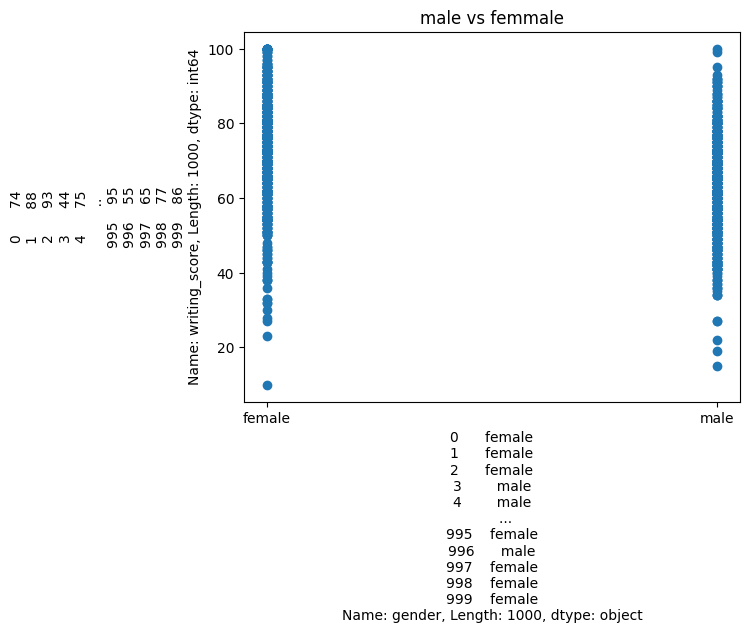

In [19]:
plt.scatter(df['gender'],df['writing_score'])
plt.xlabel(df["gender"])
plt.ylabel(df['writing_score'])
plt.title('male vs femmale')
plt.show()

In [20]:
df.head()

,gender,raceethnicity,parental_level_of_education,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,some college,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,some college,76,78,75


In [21]:
df.count()

gender                         1000
raceethnicity                  1000
parental_level_of_education    1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64

In [22]:
df['gender'].value_counts()['female']
df['gender'].value_counts()['male']



np.int64(482)

In [23]:
df['gender'].value_counts()['female']


np.int64(518)

In [24]:
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
mask = df['math_score'].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
df_no_outliers = df[mask]


In [25]:
df

,gender,raceethnicity,parental_level_of_education,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,some college,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,some college,76,78,75
...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95
996,male,group C,high school,62,55,55
997,female,group C,high school,59,71,65
998,female,group D,some college,68,78,77


In [26]:
df.isnull()

,gender,raceethnicity,parental_level_of_education,math_score,reading_score,writing_score
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False
